In [ ]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as sm
from statsmodels.stats.anova import anova_lm
CAHousing = files.upload()

Saving California Housing Data Cleaned.xlsx to California Housing Data Cleaned (2).xlsx


In [ ]:
CAHousing = pd.read_excel('California Housing Data Cleaned (2).xlsx')

In [ ]:
near_bay_data = CAHousing.loc[CAHousing["ocean_proximity"] == "NEAR BAY", "median_house_value"]
near_ocean_data = CAHousing.loc[CAHousing["ocean_proximity"] == "NEAR OCEAN", "median_house_value"]
ocean_data = CAHousing.loc[CAHousing["ocean_proximity"] == "<1H OCEAN", "median_house_value"]
inland_data = CAHousing.loc[CAHousing["ocean_proximity"] == "INLAND", "median_house_value"]

Text(0.5, 1.0, 'Average House Value For Each Range of Ocean Proximity')

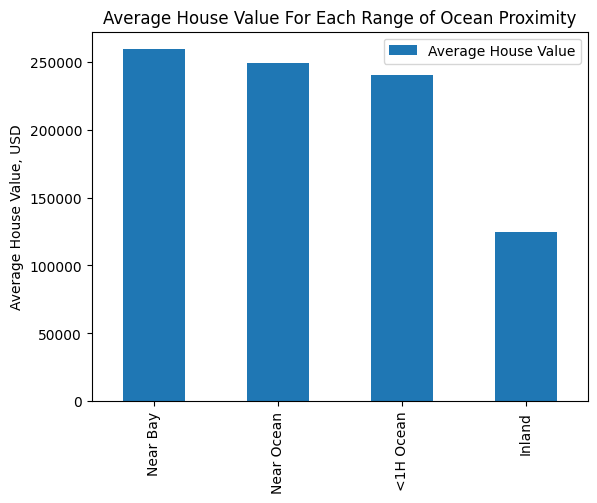

In [ ]:
average_house_value = pd.DataFrame({'Ocean Proximity':['Near Bay','Near Ocean','<1H Ocean','Inland'],'Average House Value':[near_bay_data.mean(),near_ocean_data.mean(),ocean_data.mean(),inland_data.mean()]})
plt = average_house_value.plot.bar()
plt.set_xticks([0, 1, 2, 3], ['Near Bay','Near Ocean','<1H Ocean','Inland'])
plt.set_ylabel("Average House Value, USD")
plt.set_title("Average House Value For Each Range of Ocean Proximity")

In [ ]:
print(near_bay_data.describe())
print(near_ocean_data.describe())
print(ocean_data.describe())
print(inland_data.describe())

count      2290.000000
mean     259212.311790
std      122818.537064
min       22500.000000
25%      162500.000000
50%      233800.000000
75%      345700.000000
max      500001.000000
Name: median_house_value, dtype: float64
count      2657.000000
mean     249396.127964
std      122484.651585
min       22500.000000
25%      150000.000000
50%      229400.000000
75%      322600.000000
max      500001.000000
Name: median_house_value, dtype: float64
count      9134.000000
mean     240043.795818
std      106094.817189
min       17500.000000
25%      164100.000000
50%      214800.000000
75%      289000.000000
max      500001.000000
Name: median_house_value, dtype: float64
count      6541.000000
mean     124755.270295
std       70024.277455
min       14999.000000
25%       77500.000000
50%      108500.000000
75%      148800.000000
max      500001.000000
Name: median_house_value, dtype: float64


Text(0.5, 1.0, 'Average House Value For Each Range of Ocean Proximity (25th percentile)')

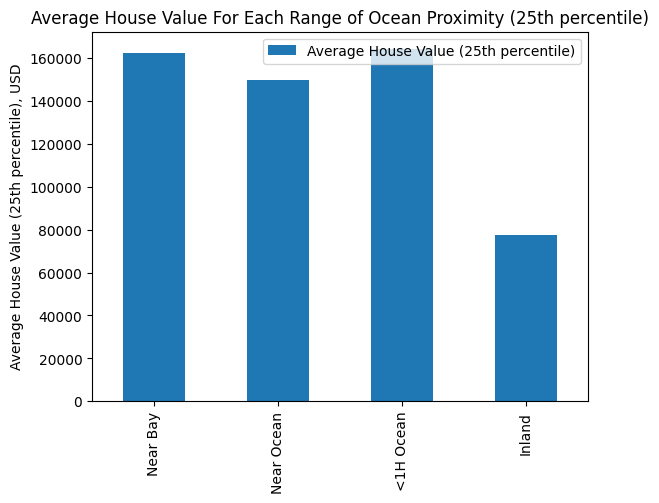

In [ ]:
quarter_percentile_data = pd.DataFrame({'Ocean Proximity':['Near Bay','Near Ocean','<1H Ocean','Inland'],'Average House Value (25th percentile)':[near_bay_data.quantile(0.25),near_ocean_data.quantile(0.25),ocean_data.quantile(0.25),inland_data.quantile(0.25)]})
plt = quarter_percentile_data.plot.bar()
plt.set_xticks([0, 1, 2, 3], ['Near Bay','Near Ocean','<1H Ocean','Inland'])
plt.set_ylabel("Average House Value (25th percentile), USD")
plt.set_title("Average House Value For Each Range of Ocean Proximity (25th percentile)")

Text(0.5, 1.0, 'Average House Value For Each Range of Ocean Proximity (75th percentile)')

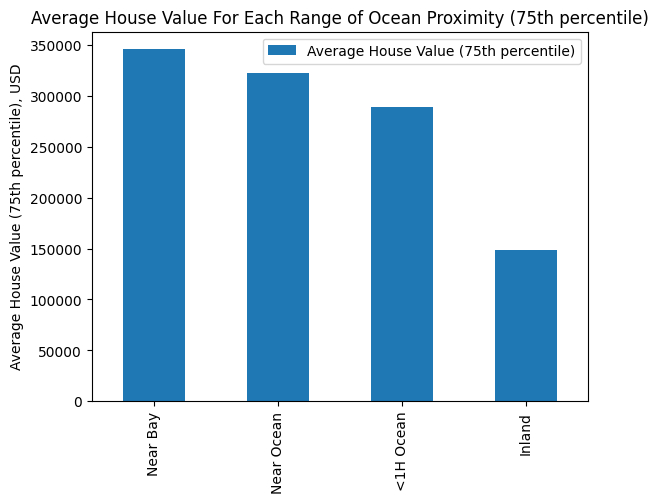

In [ ]:
three_quarter_percentile_data = pd.DataFrame({'Ocean Proximity':['Near Bay','Near Ocean','<1H Ocean','Inland'],'Average House Value (75th percentile)':[near_bay_data.quantile(0.75),near_ocean_data.quantile(0.75),ocean_data.quantile(0.75),inland_data.quantile(0.75)]})
plt = three_quarter_percentile_data.plot.bar()
plt.set_xticks([0, 1, 2, 3], ['Near Bay','Near Ocean','<1H Ocean','Inland'])
plt.set_ylabel("Average House Value (75th percentile), USD")
plt.set_title("Average House Value For Each Range of Ocean Proximity (75th percentile)")

Text(0.5, 1.0, 'Median House Value vs. Median Income')

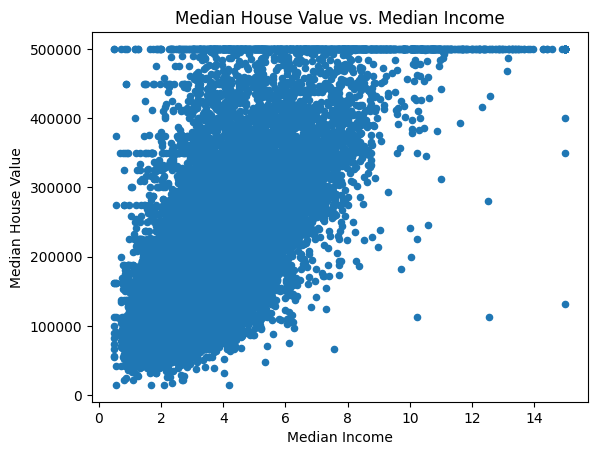

In [ ]:
scatter_plot_data = pd.DataFrame({'Median Income':CAHousing["median_income"],'Median House Value':CAHousing["median_house_value"]})
splt = scatter_plot_data.plot.scatter(x=0,y=1)
splt.set_title("Median House Value vs. Median Income")

In [ ]:
SLR=sm.ols(formula = 'CAHousing.median_house_value ~ CAHousing.median_income', data = CAHousing).fit()
SLR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     CAHousing.median_house_value   R-squared:                       0.474
Model:                                      OLS   Adj. R-squared:                  0.474
Method:                           Least Squares   F-statistic:                 1.860e+04
Date:                          Fri, 08 Dec 2023   Prob (F-statistic):               0.00
Time:                                  01:56:23   Log-Likelihood:            -2.6307e+05
No. Observations:                         20627   AIC:                         5.261e+05
Df Residuals:                             20625   BIC:                         5.262e+05
Df Model:                                     1                                         
Covariance Type:                      nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                4.489e+04   1322.672     33.936      0.000    4.23e+04    4.75e+04
CAHousing.median_income  4.185e+04    306.807    136.398      0.000    4.12e+04    4.24e+04
==============================================================================
Omnibus:                     4259.470   Durbin-Watson:                   1.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9303.762
Skew:                           1.196   Prob(JB):                         0.00
Kurtosis:                       5.260   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
MLR=sm.ols(formula = 'CAHousing.median_house_value ~ CAHousing.people_per_household + CAHousing.housing_median_age', data = CAHousing).fit()
MLR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     CAHousing.median_house_value   R-squared:                       0.068
Model:                                      OLS   Adj. R-squared:                  0.068
Method:                           Least Squares   F-statistic:                     754.7
Date:                          Fri, 08 Dec 2023   Prob (F-statistic):          4.70e-317
Time:                                  02:23:41   Log-Likelihood:            -2.6897e+05
No. Observations:                         20627   AIC:                         5.379e+05
Df Residuals:                             20624   BIC:                         5.380e+05
Df Model:                                     2                                         
Covariance Type:                      nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                       2.727e+05   3262.831     83.591      0.000    2.66e+05    2.79e+05
CAHousing.people_per_household -3.176e+04    893.415    -35.549      0.000   -3.35e+04      -3e+04
CAHousing.housing_median_age     952.2526     61.650     15.446      0.000     831.414    1073.091
==============================================================================
Omnibus:                     2185.780   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2939.951
Skew:                           0.897   Prob(JB):                         0.00
Kurtosis:                       3.451   Cond. No.                         135.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
anova_lm(MLR)

,df,sum_sq,mean_sq,F,PR(>F)
CAHousing.people_per_household,1.0,1.577009e+13,1.577009e+13,1270.840837,3.726607e-270
CAHousing.housing_median_age,1.0,2.960633e+12,2.960633e+12,238.584184,1.596929e-53
Residual,20624.0,2.559268e+14,1.240917e+10,NaN,NaN
